In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
from calicropyield.loader import DataDownloader

In [3]:
downloader = DataDownloader(
    target_dir="../data",
)

In [ ]:
downloader.download_Climate(
    county_names = ['Monterey'], 
    years = [2020], 
    geometry = None, 
    variables = None)

⬇️ Downloading Monterey_DayMet_2020.nc


Downloading...
From: https://drive.google.com/uc?id=1YIQRkvhV8--b_A98dhidiRZIpPLQJEuV
To: /home/hkaman/Documents/california-crop-yield-benchmark/data/counties/Monterey/data/climate/2020/Monterey_DayMet_2020.nc
100%|██████████| 39.7M/39.7M [00:00<00:00, 99.0MB/s]


In [ ]:
import os
import xarray
climate_path = "../data/counties/Monterey/data/climate/2020/Monterey_DayMet_2020.nc"
climate_data = xarray.open_dataset(climate_path)
climate_data

<xarray.Dataset> Size: 249MB
Dimensions:                  (x: 128, y: 148, time: 365)
Coordinates:
  * x                        (x) float64 1kB -1.867e+06 -1.866e+06 ... -1.74e+06
  * y                        (y) float64 1kB -3.53e+05 -3.54e+05 ... -5e+05
  * time                     (time) datetime64[ns] 3kB 2020-01-01 ... 2020-12-30
Data variables: (12/13)
    lambert_conformal_conic  int64 8B ...
    srad                     (time, y, x) float32 28MB ...
    lat                      (y, x) float64 152kB ...
    lon                      (y, x) float64 152kB ...
    tmax                     (time, y, x) float32 28MB ...
    vp                       (time, y, x) float32 28MB ...
    ...                       ...
    prcp                     (time, y, x) float32 28MB ...
    swe                      (time, y, x) float32 28MB ...
    dayl                     (time, y, x) float32 28MB ...
    snow                     (time, y, x) float32 28MB ...
    elevation                (y, x) float32 76kB ...
    pet                      (time, y, x) float32 28MB ...
Attributes:
    citation:            Please see http://daymet.ornl.gov/ for current Dayme...
    references:          Please see http://daymet.ornl.gov/ for current infor...
    start_year:          2020
    source:              Daymet Software Version 4.0
    Version_data:        Daymet Data Version 4.0
    Version_software:    Daymet Software Version 4.0
    Conventions:         CF-1.6
    History:             Translated to CF-1.0 Conventions by Netcdf-Java CDM ...
    geospatial_lat_min:  35.43451593477847
    geospatial_lat_max:  37.26966284692765
    geospatial_lon_min:  -122.33765511429823
    geospatial_lon_max:  -119.88556322742085

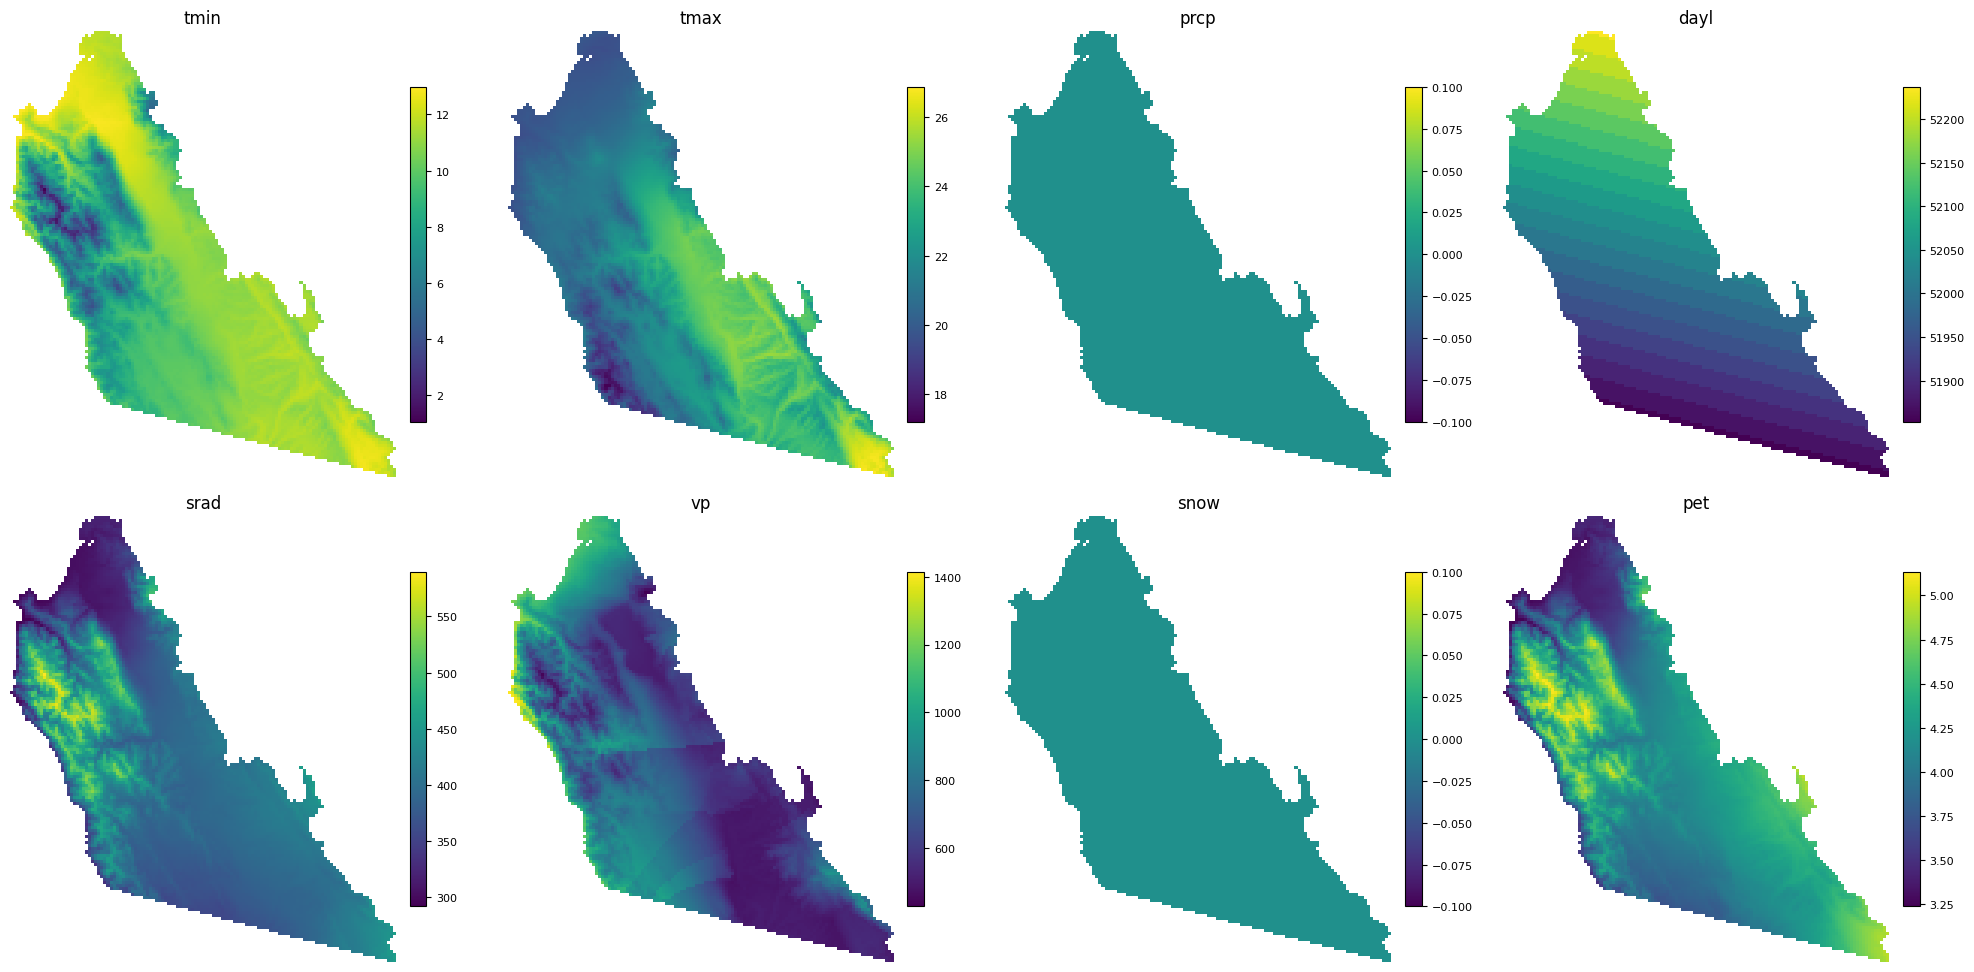

In [6]:
import matplotlib.pyplot as plt

variable_names = ['tmin', 'tmax', 'prcp', 'dayl', 'srad', 'vp', 'snow', 'pet']
day_180 = climate_data.sel(time=climate_data.time[179])  # Day 180 of 365

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, var_name in enumerate(variable_names):
    row, col = divmod(i, 4)
    ax = axs[row, col]

    data = day_180[var_name]
    im = ax.imshow(data, cmap='viridis')
    ax.set_facecolor("white")
    ax.set_title(var_name)
    ax.axis('off')

    cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.7, pad=0.03)
    cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()